In [466]:
import sqlite3
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [467]:
con = sqlite3.connect('lahman2014.sqlite')

<h>PART ONE : Data Wrangling</h>

In [567]:
sqlStatmentTeams = 'SELECT salaries.teamID ,salaries.yearID ,(W*100.0 / G)as winPrec , sum(salary)as payRoll FROM salaries   INNER JOIN teams on  Teams.yearID = SALARIES.yearID  and  Teams.teamID = salaries.teamID  Group by teams.yearID , teams.teamID'
Teams = pd.read_sql(sqlStatmentTeams,con)

<h1>Deadling With missing Data by making inner join between team table and salary so if a team has no salary it's Excluded</h1>

In [568]:
Teams

,teamID,yearID,winPrec,payRoll
0,ATL,1985,40.740741,14807000.0
1,BAL,1985,51.552795,11560712.0
2,BOS,1985,49.693252,10897560.0
3,CAL,1985,55.555556,14427894.0
4,CHA,1985,52.147239,9846178.0
...,...,...,...,...
853,SLN,2014,55.555556,120693000.0
854,TBA,2014,47.530864,72689100.0
855,TEX,2014,41.358025,112255059.0
856,TOR,2014,51.234568,109920100.0


In [569]:
sqlStatment = 'SELECT teamID from teams '
AllTeams = pd.read_sql(sqlStatment,con)


In [570]:
AllTeams = np.unique(AllTeams)

In [682]:
RealWP = [] 
for team in AllTeams :
    SS = 'SELECT G,W from teams where teamID ="%s"'%(team)
    Data = pd.read_sql(SS,con)
    Data = np.asarray(Data)
    Res = (Data[:,1]/Data[:,0]).sum()/Data.shape[0]
    Res= Res * 100 
    RealWP.append([team,Res])


In [683]:
RealPay = [] 
Data = pd.DataFrame(columns=['teamID','yearID','sum(salary)'])
for team in AllTeams :
    SS = 'SELECT  teamID ,yearID , sum(salary) from Salaries where teamID  = "{}" and yearId >= 1990 and yearID<=2014 GROUP BY yearID '.format(str(team))
    Data2=pd.read_sql(SS,con)
    
    if (Data2.empty == False):
        
        Data = Data.append(Data2,ignore_index=True)


Data

,teamID,yearID,sum(salary)
0,ANA,1997,31135472.0
1,ANA,1998,41281000.0
2,ANA,1999,55388166.0
3,ANA,2000,51464167.0
4,ANA,2001,47535167.0
...,...,...,...
723,WAS,2010,61400000.0
724,WAS,2011,63856928.0
725,WAS,2012,80855143.0
726,WAS,2013,113703270.0


In [578]:
sqlStatment = 'SELECT playerID from master '
AllPlayers = pd.read_sql(sqlStatment,con)
AllPlayers = np.unique(AllPlayers)
AllPlayers

array(['aardsda01', 'aaronha01', 'aaronto01', ..., 'zuvelpa01',
       'zuverge01', 'zwilldu01'], dtype=object)

# Running the next code will take about 1 min please Wait 

In [584]:
PlayersAvgSalary = []
for player in AllPlayers :
    SS = 'SELECT salary from Salaries where PlayerID ="%s" and salary <> 0 '%(player)
    Datax = pd.read_sql(SS,con)

    Datax = np.asarray(Datax)
    
    if (Datax.shape[0]!=0):
        PlayersAvgSalary.append([player,Datax.sum()/Datax.shape[0]])


In [585]:
PlayersAvgSalary=np.asarray(PlayersAvgSalary)

In [586]:
SS = 'SELECT * from Salaries'
SalaryTable = pd.read_sql(SS,con)


In [587]:
# for i in range(PlayersAvgSalary.shape[0]):
#     playerName = PlayersAvgSalary[i,0]
#     SalaryTable = SalaryTable.where()
print(SalaryTable)
ST  = np.asarray(SalaryTable)

       yearID teamID lgID   playerID      salary
0        1985    ATL   NL  barkele01    870000.0
1        1985    ATL   NL  bedrost01    550000.0
2        1985    ATL   NL  benedbr01    545000.0
3        1985    ATL   NL   campri01    633333.0
4        1985    ATL   NL  ceronri01    625000.0
...       ...    ...  ...        ...         ...
24753    2014    WAS   NL  storedr01   3450000.0
24754    2014    WAS   NL  strasst01   3975000.0
24755    2014    WAS   NL  werthja01  20000000.0
24756    2014    WAS   NL  zimmejo02   7500000.0
24757    2014    WAS   NL  zimmery01  14000000.0

[24758 rows x 5 columns]


In [588]:
import matplotlib.pyplot as plt

In [589]:
sqlStatmentTeams = 'SELECT teamID,G,W ,yearID from teams where yearID >= 1990 and yearID <=2014 group by teamID , yearID'
Teams = pd.read_sql(sqlStatmentTeams,con)
Teams 

,teamID,G,W,yearID
0,ANA,162,84,1997
1,ANA,162,85,1998
2,ANA,162,70,1999
3,ANA,162,82,2000
4,ANA,162,75,2001
...,...,...,...,...
723,WAS,162,69,2010
724,WAS,161,80,2011
725,WAS,162,98,2012
726,WAS,162,86,2013


Text(0, 0.5, 'Pay roll')

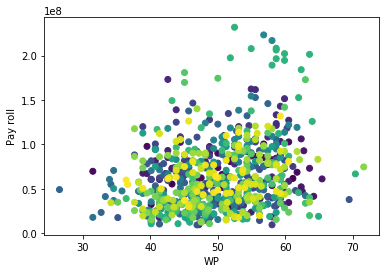

In [679]:
years = Data.iloc[:,1]
payRoll = Data.iloc[:,2]
TeamIDs = Data.iloc[:,0]

uniqueTeams = np.unique(TeamIDs)
colors = [i for i in range(uniqueTeams.shape[0])] 
AssignedColor = [ np.where(uniqueTeams==i)[0] for i in (TeamIDs)]
AssignedColor = [AssignedColor[i][0] for i in range(len(AssignedColor))]
plt.scatter(Teams.iloc[:,2]* 100 /Teams.iloc[:,1] , Data.iloc[:,2],c=AssignedColor )
plt.xlabel('WP')
plt.ylabel('Pay roll')


In [591]:
np.corrcoef(Teams.iloc[:,2]* 100 /Teams.iloc[:,1] , Data.iloc[:,2])

array([[1.        , 0.25877521],
       [0.25877521, 1.        ]])

<h1>Part2 : payroll against years </h1>
<p>we Can notice from the graph that payroll increase for each team through the years </p>

Text(0, 0.5, 'payRoll')

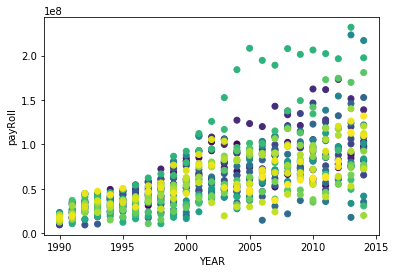

In [677]:


plt.scatter(years , payRoll,c=AssignedColor)
plt.xlabel('YEAR')
plt.ylabel('payRoll')


In [593]:
np.nanstd(np.asarray([years,payRoll],dtype=np.float64))

41635523.94282998

<h2>discretizing the years into five periods </h2>

In [594]:
RangeSet = [[i,i+4] for i in range(1990,2014,5)]
RangeSet

[[1990, 1994], [1995, 1999], [2000, 2004], [2005, 2009], [2010, 2014]]

In [595]:
TeamIDs = np.unique(TeamIDs)

In [616]:
DPayRoll = []
for t in TeamIDs:
    index = 0 
    for r in RangeSet:
        
            SS = 'SELECT  teamID ,yearID , sum(salary) from Salaries where teamID  = "{}" and yearId >= {} and yearID<={} GROUP BY yearID '.format(str(t),r[0],r[1])
            newData = pd.read_sql(SS,con)
            
            if (newData.empty == False) :
                newData = [t , index ,sum(newData.iloc[:,2])/newData.shape[0]]
                
                DPayRoll.append(newData)
            index = index + 1 


In [597]:
DiscWP = [] 
for  t in TeamIDs:
    index = 0 
    for r in RangeSet:
        SS = 'SELECT G,W from teams where teamID ="{}" and yearId >= {} and yearID<={}'.format(t,r[0],r[1])
        
        newData = pd.read_sql(SS,con)
        
        if (newData.empty==False):
            Res = sum((newData.iloc[:,1]/newData.iloc[:,0]))/newData.shape[0]
            Res= Res * 100 
            DiscWP.append([t,index,Res])
        index = index + 1 
len(DiscWP)

151

# change the paramter ChoosePeriod from 0 : 4 to change the plot

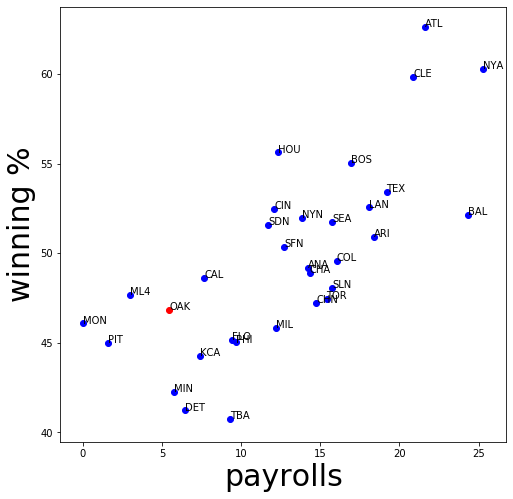

In [681]:
ChoosePeriod = 1
DiscWP = np.asarray(DiscWP )
DiscPayRoll =np.asarray(DPayRoll)
pays = np.asarray(DiscPayRoll[:,2] , dtype = float)
pays = (pays-np.min(pays))/(np.max(pays)-np.min(pays)) 
pays = pays * 100 
wins  = np.asarray(DiscWP[:,2],dtype=float)
plt.figure(figsize=(8,8))
yearPeriods = np.asarray(DiscWP[:,1] , dtype = int)
plt.xlabel("payrolls",fontsize = 30)
plt.ylabel("winning %",fontsize=30)

for i in range (pays.shape[0]):
   
    if (yearPeriods [i]==ChoosePeriod ):
        if (DiscWP[i,0].__contains__('OAK')):
            plt.scatter(pays[i],wins[i],c='red')
        else:
            plt.scatter(pays[i],wins[i],c='blue')
        plt.annotate(DiscWP[i,0],(pays[i],wins[i]))

# conclusion both teams ATL and NYA can be considered pay to win teams .
# OAK had very high effciency between 2000 and 2005 which is the 2 period 

Text(0, 0.5, 'mean payroll')

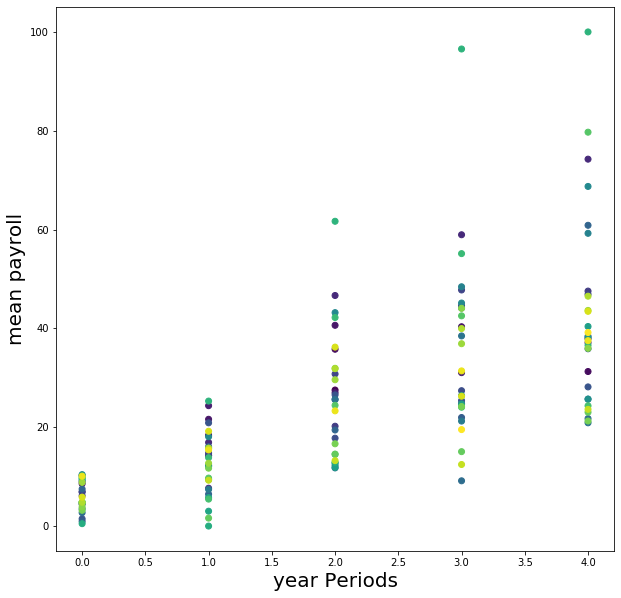

In [599]:

uniqueTeams = np.unique(DiscWP[:,0])
colors = [i for i in range(uniqueTeams.shape[0])] 
AssignedColor = [ np.where(uniqueTeams==i)[0] for i in (DiscWP[:,0])]
AssignedColor = [AssignedColor[i][0] for i in range(len(AssignedColor))]
plt.figure(figsize=(10,10))
plt.scatter(yearPeriods,pays,c=AssignedColor)
plt.xlabel('year Periods',fontsize=20)
plt.ylabel('mean payroll',fontsize=20)

Text(0, 0.5, 'mean wins')

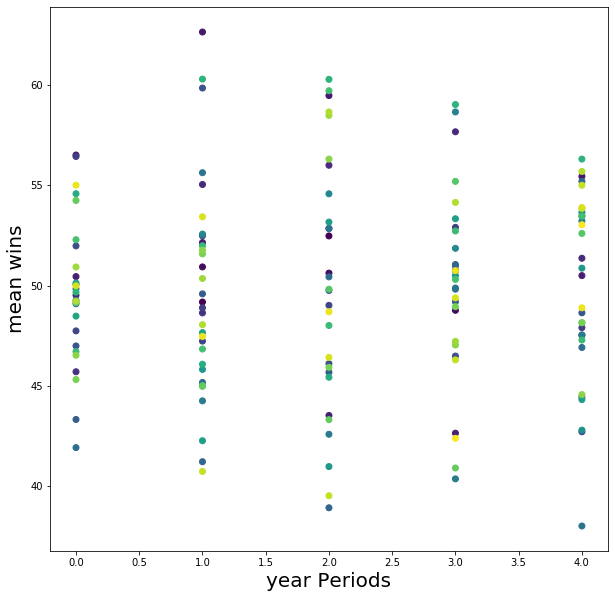

In [600]:
plt.figure(figsize=(10,10))
plt.scatter(yearPeriods,wins,c=AssignedColor)
plt.xlabel('year Periods',fontsize=20)
plt.ylabel('mean wins',fontsize=20)

<h1>Caluculating standardized payroll</h1>

In [644]:
PGY = []
for y in range(1990,2015,1):
    tempList = []
    for i in range (Data.shape[0]):
        if (Data.iloc[i,1]==y):
            tempList.append(Data.iloc[i,2])
    PGY.append([y,np.nanstd(tempList),sum(tempList)/len(tempList)])
PGY = np.asarray(PGY) 
PGY = pd.DataFrame({'yearID':PGY[:,0],'STD_Payroll':PGY[:,1],'Avg_Payroll':PGY[:,2]})
PGY

,yearID,STD_Payroll,Avg_Payroll
0,1990.0,3.698588e+06,1.707235e+07
1,1991.0,6.760779e+06,2.357879e+07
2,1992.0,8.972909e+06,3.098244e+07
3,1993.0,9.066120e+06,3.220500e+07
4,1994.0,8.375066e+06,3.313701e+07
5,1995.0,9.277750e+06,3.398105e+07
6,1996.0,1.049593e+07,3.417798e+07
7,1997.0,1.282538e+07,4.026021e+07
8,1998.0,1.512229e+07,4.260943e+07
9,1999.0,2.021574e+07,4.980762e+07


In [645]:
TransformedPayRoll = []
for i in range (Data.shape[0]):
    y = Data.iloc[i,1]
    for x in range (PGY.shape[0]):
        if (PGY.iloc[x,0]==y):
            TransformedPayRoll.append((Data.iloc[i,2]-PGY.iloc[x,2]) /PGY.iloc[x,1] )
TransformedPayRoll = TransformedPayRoll

# Transformed payroll vs win precentage for each time 

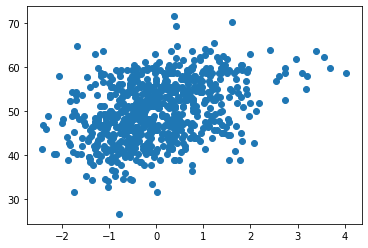

In [646]:

plt.scatter(TransformedPayRoll,Teams.iloc[:,2]* 100 /Teams.iloc[:,1])

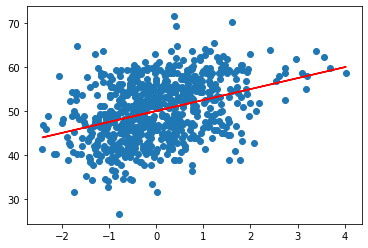

In [628]:
plt.scatter(TransformedPayRoll,Teams.iloc[:,2]* 100 /Teams.iloc[:,1])
plt.plot(TransformedPayRoll,50 + 2.5 * np.asarray(TransformedPayRoll,dtype=float),color='r')

In [630]:
Y = np.asarray(Teams.iloc[:,2]* 100 /Teams.iloc[:,1],dtype = float)
X= np.asarray(TransformedPayRoll,dtype=float)
X = X.reshape(X.shape[0],1)
from sklearn import linear_model

In [631]:
from sklearn.model_selection import train_test_split


In [632]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
cls = linear_model.LinearRegression()
cls.fit(X_train , y_train) 
print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)


Co-efficient of linear regression [2.65313945]
Intercept of linear regression model 49.88996844362248


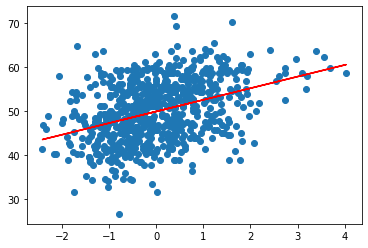

In [635]:
prediction = cls.predict(X)
plt.scatter(X,Y)
plt.plot( X,prediction , color='r')

In [612]:
efficiency = Y - (50 + 2.5 * np.asarray(TransformedPayRoll))

In [613]:
pd.DataFrame({'Team' :Teams.iloc[:,0],'efficiency':efficiency})

,Team,efficiency
0,ANA,3.630500
1,ANA,2.688750
2,ANA,-7.480247
3,ANA,1.100949
4,ANA,-1.869770
...,...,...
723,WAS,-5.451939
724,WAS,1.493752
725,WAS,11.661196
726,WAS,2.432778


# we can notice two things from the graph below 
# 1- each team's efficiency change over the years 
# 2 - oak team 's efficiency has increased during the money ball period 

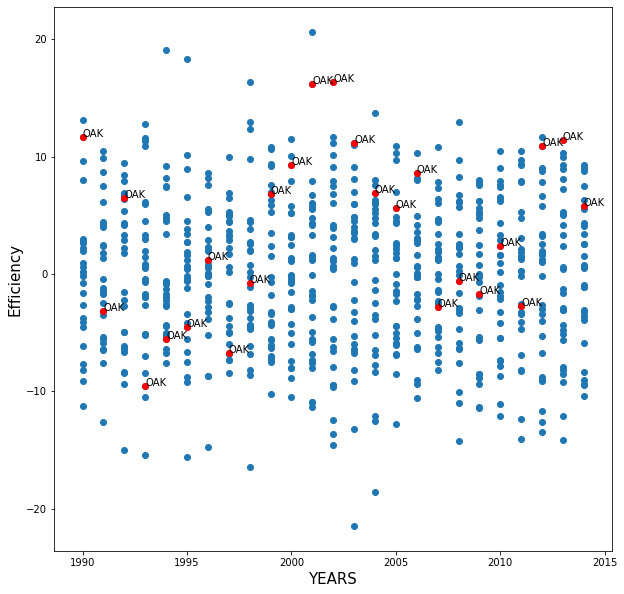

In [615]:
plt.figure(figsize=(10,10))
plt.scatter(years,efficiency)
plt.xlabel('YEARS',fontsize=15)
plt.ylabel('Efficiency',fontsize=15)
for i in range(len(years)):
    if (Teams.iloc[i,0].__contains__('OAK')):
        plt.scatter(years[i],efficiency[i],c='r')
        plt.annotate('OAK',(years[i],efficiency[i]))